In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing essential libraries

In [ ]:
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon

### Reading the lightning observation data for march 2016.

In [ ]:
df0=pd.read_csv("/content/drive/MyDrive/Lightning/data/lightning observation data/LLN_data/2016/mar2016.csv")
df0.head()

,FlashID,PartitionSegmentCode,LightningTimeString,Latitude,Longitude,Height,StrokeType,Amplitude,StrokeSolution,Confidence,FlashDate
0,19711600,7,2016-03-02T07:37:32.583952605,18.86651,76.29739,8516,1,1785,NaN,100,2016-03-02
1,19711601,7,2016-03-02T07:37:49.167797148,18.87154,76.32158,19172,1,4951,NaN,100,2016-03-02
2,19711602,7,2016-03-02T07:38:08.940010309,18.85235,76.31372,0,0,-14843,NaN,100,2016-03-02
3,19711603,7,2016-03-02T07:38:09.000714600,18.86429,76.32573,7208,1,-1631,NaN,100,2016-03-02
4,19711604,7,2016-03-02T07:38:31.620536267,18.85306,76.32258,0,0,-22678,NaN,100,2016-03-02


### Pre-processing

In [ ]:
df0.drop('FlashID', inplace=True, axis=1)
df0.drop('FlashDate', inplace=True, axis=1)
df0.drop('PartitionSegmentCode',inplace=True, axis=1)
df0.drop('StrokeSolution', inplace=True, axis=1)
df0.drop('Confidence', inplace=True, axis=1)
df0.drop('StrokeType', inplace=True, axis=1)
df0.drop('Height', inplace=True, axis=1)

In [ ]:
li= []
from dateutil import parser

for i in df0.iloc[:,0].to_numpy():
  date_time = i.split('T')[0]+' '+i.split('T')[1].split('.')[0]
  time_obj = parser.parse(date_time)
  li.append(time_obj)

In [ ]:
df0['date_time'] = li
df0.drop('LightningTimeString', inplace=True, axis=1)

In [ ]:
df0=df0.loc[df0['date_time']>='2016-04-01 00:00:00']

In [ ]:
df0.head()

,Latitude,Longitude,Amplitude,date_time
264654,13.18362,75.46833,-7978,2016-04-01 08:44:45
264655,13.36123,75.51986,-3377,2016-04-01 08:44:45
264656,12.41445,75.64781,-6007,2016-04-01 08:44:55
264657,12.33842,75.59803,-10420,2016-04-01 08:45:08
264658,12.98830,75.49118,-4533,2016-04-01 08:45:20


### Reading lightning observation data for Apr and May 2016.

In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/Lightning/data/lightning observation data/LLN_data/2016/apr2016.csv.csv")
df1.head()

,FlashID,PartitionSegmentCode,LightningTimeString,Latitude,Longitude,Height,StrokeType,Amplitude,StrokeSolution,Confidence,FlashDate
0,19977383,8,2016-04-02T03:02:03.368053853,20.28834,76.30784,15848,1,2420,NaN,100,2016-04-02
1,19977384,8,2016-04-02T03:02:24.378012239,20.17544,76.15047,10116,1,2752,NaN,100,2016-04-02
2,19977385,8,2016-04-02T03:02:30.949489057,20.35937,76.15160,16724,1,1695,NaN,100,2016-04-02
3,19977386,8,2016-04-02T03:02:45.333872795,19.99831,76.34494,13648,1,2062,NaN,100,2016-04-02
4,19977387,8,2016-04-02T03:03:15.052032470,18.81921,77.29768,11492,1,2703,NaN,100,2016-04-02


In [ ]:
df2=pd.read_csv("/content/drive/MyDrive/Lightning/data/lightning observation data/LLN_data/2016/may2016.csv")
df2.head()

,FlashID,PartitionSegmentCode,LightningTimeString,Latitude,Longitude,Height,StrokeType,Amplitude,StrokeSolution,Confidence,FlashDate
0,20384152,9,2016-05-02T00:00:27.411211133,18.42975,79.22950,18963,1,-4103,NaN,100,2016-05-02
1,20384153,9,2016-05-02T00:00:35.346567988,19.00976,77.17369,17856,1,-25736,NaN,100,2016-05-02
2,20384154,9,2016-05-02T00:00:40.093399405,18.15073,78.62131,0,0,-16268,NaN,100,2016-05-02
3,20384155,9,2016-05-02T00:00:46.535104095,18.38781,79.32399,0,0,-18120,NaN,100,2016-05-02
4,20384156,9,2016-05-02T00:00:51.666600942,18.00808,78.78360,0,0,-7211,NaN,100,2016-05-02


### Further pre-processing

In [ ]:
 frames = [df1, df2]
 df = pd.concat(frames)

In [ ]:
df.drop('FlashID', inplace=True, axis=1)
df.drop('FlashDate', inplace=True, axis=1)
df.drop('PartitionSegmentCode',inplace=True, axis=1)
df.drop('StrokeSolution', inplace=True, axis=1)
df.drop('Confidence', inplace=True, axis=1)
df.drop('StrokeType', inplace=True, axis=1)
df.drop('Height', inplace=True, axis=1)

In [ ]:
li= []
from dateutil import parser
for i in df.iloc[:,0].to_numpy():
  date_time = i.split('T')[0]+' '+i.split('T')[1].split('.')[0]
  time_obj = parser.parse(date_time)
  li.append(time_obj)

In [ ]:
df['date_time'] = li
df.drop('LightningTimeString', inplace=True, axis=1)

In [ ]:
df.head()

,Latitude,Longitude,Amplitude,date_time
0,20.28834,76.30784,2420,2016-04-02 03:02:03
1,20.17544,76.15047,2752,2016-04-02 03:02:24
2,20.35937,76.15160,1695,2016-04-02 03:02:30
3,19.99831,76.34494,2062,2016-04-02 03:02:45
4,18.81921,77.29768,2703,2016-04-02 03:03:15


In [ ]:
frames= [df0,df]
df = pd.concat(frames)

In [ ]:
df = df[(df["Latitude"].between(15,22))]

In [ ]:
df = df[(df["Longitude"].between(73,81))]

In [ ]:
df.sort_values('date_time')

,Latitude,Longitude,Amplitude,date_time
264903,15.11710,77.05125,3490,2016-04-01 09:44:02
264949,15.06641,77.07606,-18315,2016-04-01 09:46:40
264956,15.33542,75.40351,-1458,2016-04-01 09:47:06
265000,15.05395,77.07642,-13704,2016-04-01 09:51:25
265008,15.03168,77.07406,-10760,2016-04-01 09:52:03
...,...,...,...,...
1384446,15.50957,77.34980,6036,2016-06-01 23:59:49
1384448,15.89444,79.33923,-6842,2016-06-01 23:59:50
1384444,15.35075,79.12334,-22020,2016-06-01 23:59:50
1384445,15.56085,77.38952,-4673,2016-06-01 23:59:50


In [ ]:
df.head()

,Latitude,Longitude,Amplitude,date_time
264903,15.11710,77.05125,3490,2016-04-01 09:44:02
264949,15.06641,77.07606,-18315,2016-04-01 09:46:40
264956,15.33542,75.40351,-1458,2016-04-01 09:47:06
265000,15.05395,77.07642,-13704,2016-04-01 09:51:25
265008,15.03168,77.07406,-10760,2016-04-01 09:52:03


###Storing the lightning observations based on its occurrences over a specific grid.

In [ ]:
from datetime import datetime, timedelta

def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta

dts = [dt.strftime('%Y-%m-%dT%H:%M:%S') for dt in 
       datetime_range(datetime(2016, 4, 1, 0), datetime(2016, 6, 1, 0), 
       timedelta(minutes=60))]

time_intervals = []

for i in dts:
  date_time = i.split('T')[0]+' '+i.split('T')[1]
  time_obj = parser.parse(date_time)
  time_intervals.append(time_obj)

print(time_intervals[0])
print(len(time_intervals))

2016-04-01 00:00:00
1464


In [ ]:
lons = np.arange(73,81,0.25)

In [ ]:
lats = np.arange(15,22,0.25)

In [ ]:
times = time_intervals  

In [ ]:
data = np.zeros((1464,29,33))

### Storing the lightning observations based on its occurrences over a specific grid.

In [ ]:
for i in range(len(df)):
  date_time = df.iloc[i,3]
  latitude,longitude,amplitude = df.iloc[i,0],df.iloc[i,1],df.iloc[i,2]
  index = 0
  for j in time_intervals:
    if(date_time<=j):
      break
    index+=1
  time_index = index-1
  lat_index,long_index = int(((latitude*10)-150)/2.5), int(((longitude*10)-730)/2.5)
  try:
    if abs(amplitude) > 0:
      data[time_index,lat_index,long_index] = 1
    else:
      data[time_index,lat_index,long_index] = 0
  except:
    print(latitude,longitude)
    break

### Reading meteorological data

In [ ]:
import xarray as xr

In [ ]:
ds_disk1 = xr.open_dataset("/content/drive/MyDrive/Lightning/data/meteorological data/Single_Level/adaptor.mars.internal-1630658730.089707-26046-11-890d3a81-6e34-4a12-b51b-1f1ab2fcc725.nc)

In [ ]:
ds_disk1

<xarray.Dataset>
Dimensions:    (latitude: 29, longitude: 33, time: 1464)
Coordinates:
  * longitude  (longitude) float32 73.0 73.25 73.5 73.75 ... 80.5 80.75 81.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... 15.5 15.25 15.0
  * time       (time) datetime64[ns] 2016-04-01 ... 2016-05-31T23:00:00
Data variables:
    cape       (time, latitude, longitude) float32 ...
    p80.162    (time, latitude, longitude) float32 ...
    p79.162    (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-09-03 08:45:39 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [ ]:
ds_disk1.cape.values.shape

(1464, 29, 33)

In [ ]:
ds_disk2 = xr.open_dataset("/content/drive/MyDrive/Lightning/data/meteorological data/Pressure_Levels/2016.nc")

In [ ]:
ds_disk2

<xarray.Dataset>
Dimensions:    (latitude: 29, level: 16, longitude: 33, time: 1464)
Coordinates:
  * longitude  (longitude) float32 73.0 73.25 73.5 73.75 ... 80.5 80.75 81.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... 15.5 15.25 15.0
  * level      (level) int32 500 550 600 650 700 750 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 2016-04-01 ... 2016-05-31T23:00:00
Data variables:
    r          (time, level, latitude, longitude) float32 ...
    clwc       (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    w          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-09-03 08:32:44 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

###Storing lightning occurrences and meteorological data as an xarray dataset.

In [ ]:
times = ds_disk2.time.values
lon = ds_disk2.longitude.values
lat = ds_disk2.latitude.values
pressure = ds_disk2.level.values

In [ ]:
cape = ds_disk1.cape.values
p80_162 = ds_disk1['p80.162'].values
p79_162 = ds_disk1['p79.162'].values

In [ ]:
r = ds_disk2.r.values
clwc = ds_disk2.clwc.values
t = ds_disk2.t.values
w = ds_disk2.w.values

In [ ]:
data_2016 = xr.Dataset(
    {
        "r":(          
          ("time", "level", "latitude", "longitude"),
          r,
          dict(
            units = '%',
            long_name= 'Relative humidity',
            standard_name= 'relative_humidity',
            ),
        ),
        "clwc":(
          ("time", "level", "latitude", "longitude"),
          clwc,
          dict(
            units = 'kg kg**-1',
            long_name= 'Specific cloud liquid water content',
            ),
        ),
        "t":(
          ("time", "level", "latitude", "longitude"),
          t,
          dict(
            units = 'K',
            long_name= 'Temperature',
            standard_name = 'air_temperature',
            ),  
        ),
        "w":(
          ("time", "level", "latitude", "longitude"),
          w,  
          dict(
            units = 'Pa s**-1',
            long_name= 'Vertical velocity',
            standard_name = 'lagrangian_tendency_of_air_pressure',
            ), 
        ),
        "cape":(
            ("time", "latitude", "longitude"),
            cape,
            dict(
            units = 'J kg**-1',
            long_name= 'Convective available potential energy',
            ),
        ),
       "p80.162":(
           ("time", "latitude", "longitude"),
           p80_162,
           dict(
            units = 'kg m**-2 s**-1',
            long_name= 'Vertical integral of divergence of cloud frozen water flux',
            ),
       ),
       "p79.162":(
           ("time", "latitude", "longitude"),
           p79_162,
           dict(
            units = 'kg m**-2 s**-1',
            long_name= 'Vertical integral of divergence of cloud liquid water flux',
            ),
       ),
      "Amplitude":(
           ("time", "latitude", "longitude"),
           data,
           dict(
            units = 'Amp',
            long_name= 'Amplitude of lightning',
            ),
       ),
    },
    coords={"longitude": lon, "latitude": lat, "level": pressure ,"time": times},
    attrs=dict(description="Parameters affecting lightning data."),
)

In [ ]:
data_2016

<xarray.Dataset>
Dimensions:    (latitude: 29, level: 16, longitude: 33, time: 1464)
Coordinates:
  * longitude  (longitude) float32 73.0 73.25 73.5 73.75 ... 80.5 80.75 81.0
  * latitude   (latitude) float32 22.0 21.75 21.5 21.25 ... 15.5 15.25 15.0
  * level      (level) int32 500 550 600 650 700 750 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 2016-04-01 ... 2016-05-31T23:00:00
Data variables:
    r          (time, level, latitude, longitude) float32 38.85 38.14 ... 69.8
    clwc       (time, level, latitude, longitude) float32 0.0 0.0 ... 0.0 0.0
    t          (time, level, latitude, longitude) float32 265.8 265.7 ... 304.1
    w          (time, level, latitude, longitude) float32 0.0926 ... 0.009669
    cape       (time, latitude, longitude) float32 121.0 163.1 ... 2.909e+03
    p80.162    (time, latitude, longitude) float32 -5.643e-08 ... 5.897e-07
    p79.162    (time, latitude, longitude) float32 -1.743e-08 ... -2.74e-07
    Amplitude  (time, latitude, longitude) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    description:  Parameters affecting lightning data.

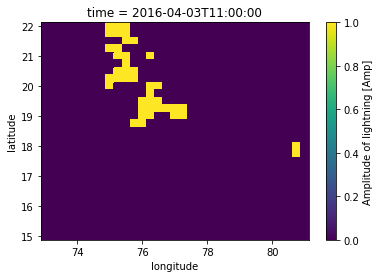

In [ ]:
plot2d = data_2016.Amplitude.isel(time=59)
plot2d.plot()

### Storing the dataset as a netcdf file.

In [ ]:
data_2016.to_netcdf('/content/drive/MyDrive/Lightning/data/pre-processed data/data2016.nc')